Sentiment Analysis of Amazon Product Reviews Using Supervised Learning

In [62]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Ensure inline plotting
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Corem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Corem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Introduction

1.1 Project Overview

This project centers on performing sentiment analysis on Amazon product reviews, with the primary objective of classifying customer feedback as either positive or negative. Sentiment analysis is a fundamental task in natural language processing (NLP) that empowers businesses to gain insights into customer opinions and satisfaction levels through textual feedback. Understanding sentiment allows businesses to make informed decisions that enhance customer satisfaction and improve products and services.

In this project, sentiment analysis is framed as a binary classification problem, aiming to categorize the sentiment expressed in customer reviews into two distinct categories: positive (indicating customer satisfaction) and negative (indicating dissatisfaction). This binary classification provides a clear and actionable understanding of customer sentiment, enabling businesses to identify strengths and weaknesses in their products or services.

The project employs supervised learning, a machine learning approach where the model is trained on a labeled dataset of Amazon product reviews. Each review in the dataset is labeled as positive or negative based on the associated star rating. By learning from this labeled data, the model is expected to accurately predict the sentiment of unseen reviews, thereby providing businesses with a reliable tool to gauge customer sentiment.

This sentiment analysis has practical applications in various business contexts. By understanding customer sentiment, businesses can:

    Improve Products and Services: Address issues highlighted in negative reviews and reinforce aspects that customers appreciate in positive reviews.
    Enhance Customer Satisfaction: Make data-driven decisions to improve customer experience, leading to increased customer loyalty.
    Stay Competitive: Use sentiment analysis as a tool to remain responsive to customer feedback and maintain a competitive edge in the market.

Overall, this project aims to demonstrate how sentiment analysis can serve as a powerful tool for businesses to better understand and respond to customer needs and preferences.

1.2 Project Goal

The goal of this project is to develop a machine learning model that can accurately classify Amazon product reviews into positive and negative sentiments. Achieving this goal involves several key steps:

    Data Preprocessing: Cleaning and preparing the text data to ensure it is suitable for model training.
    Model Selection and Training: Choosing appropriate machine learning models for sentiment classification and training them on the prepared dataset.
    Performance Evaluation: Evaluating the models using various metrics to ensure they accurately predict sentiment, even in the presence of challenges like class imbalance.
    Iteration and Improvement: Refining the models through iterations to enhance their performance and reliability.

Understanding customer sentiment is crucial for businesses, as it provides direct insights into customer satisfaction and highlights areas where products or services may need improvement. By effectively categorizing reviews, businesses can quickly identify common issues or strengths, allowing them to make informed decisions that enhance customer experience and product offerings.



2. Data Selection and Description

2.1 Data Source

The data utilized in this project is sourced from the Amazon Product Reviews dataset, with a focus on the "Office Products" category. This dataset, curated for natural language processing (NLP) tasks, was obtained from Kaggle—a. The dataset includes a vast collection of customer reviews for various office products sold on Amazon.com, each accompanied by a numerical rating (typically on a 1-5 star scale) and a variety of metadata that offers additional context.
With millions of entries, this extensive dataset provides a rich and diverse sample that is ideal for accurate sentiment analysis. The breadth and depth of this data make it a valuable resource for building robust machine learning models capable of understanding customer sentiment.

Citation (APA style):
Rajput, K. S. (2021). Amazon Review Data for NLP. Kaggle. Retrieved from https://www.kaggle.com/datasets/krishnasinghrajput/amazon-review-data-for-nlp.
2.2 Data Description

The dataset used in this project is a TSV (Tab-Separated Values) file, which contains 2,640,254 rows and 15 columns. Each row corresponds to a product review from Amazon’s Office Products category, and the columns capture various details about the reviews and the products themselves. The data is organized in a tabular format, making it consistent and reliable for analysis.

Data Types and Features:

    String/Categorical Features:
        marketplace: The marketplace where the product is sold (e.g., 'US').
        customer_id: A unique identifier for each customer.
        review_id: A unique identifier for each review.
        product_id: The unique identifier for the product.
        product_title: The title of the product.
        product_category: The category to which the product belongs (e.g., 'Office Products').
        vine: A categorical feature indicating whether the review was part of the Vine program (a program where reviewers receive free products).
        verified_purchase: Indicates whether the reviewer purchased the product through Amazon, providing authenticity to the review.
        review_headline: The headline or summary of the review.
        review_body: The main text of the review, containing the reviewer’s comments.
        review_date: The date when the review was submitted.

    Numeric Features:
        customer_id: Although typically treated as categorical, this identifier is numeric.
        product_parent: A numeric identifier for the parent product (used in Amazon’s internal data systems).
        star_rating: The rating given by the reviewer, typically on a 1-5 star scale, which is critical for sentiment analysis.
        helpful_votes: The number of users who found the review helpful.
        total_votes: The total number of votes the review received, providing context to the helpful_votes.


The dataset is structured as a single table, ensuring uniformity in data structure and format. It contains a mix of categorical and numeric features, providing a robust foundation for comprehensive sentiment analysis. The large scale of the dataset supports extensive exploratory data analysis and the development of machine learning models with a significant amount of training data.

Subset Selection for Manageability:

To make the analysis more manageable and efficient, a random subset of the dataset was selected. The original dataset, containing over 2.6 million reviews, was significantly reduced by randomly sampling 10,000 reviews. This approach ensures that the analysis remains representative of the overall data while reducing computational overhead, allowing for more focused and timely processing. By maintaining the integrity of the data through random sampling, the subset provides a reliable basis for sentiment analysis without compromising the quality of the insights derived from the study.

In [63]:

file_path = r"C:\Users\Corem\OneDrive\Desktop\AMAZON PROJECT\amazon_reviews_us_Office_Products_v1_00.tsv"
data = pd.read_csv(file_path, delimiter='\t', on_bad_lines='skip')
num_rows, num_columns = data.shape
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')
print(data.head())
print(data.info())
print(data.describe())


C:\Users\Corem\AppData\Local\Temp\ipykernel_29988\2482385203.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='\t', on_bad_lines='skip')


The dataset contains 2640254 rows and 15 columns.
  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     43081963  R18RVCKGH1SSI9  B001BM2MAC       307809868   
1          US     10951564  R3L4L6LW1PUOFY  B00DZYEXPQ        75004341   
2          US     21143145  R2J8AWXWTDX2TF  B00RTMUHDW       529689027   
3          US     52782374  R1PR37BR7G3M6A  B00D7H8XB6       868449945   
4          US     24045652  R3BDDDZMZBZDPU  B001XCWP34        33521401   

                                       product_title product_category  \
0     Scotch Cushion Wrap 7961, 12 Inches x 100 Feet  Office Products   
1          Dust-Off Compressed Gas Duster, Pack of 4  Office Products   
2  Amram Tagger Standard Tag Attaching Tagging Gu...  Office Products   
3  AmazonBasics 12-Sheet High-Security Micro-Cut ...  Office Products   
4  Derwent Colored Pencils, Inktense Ink Pencils,...  Office Products   

  star_rating  helpful_votes  total_votes vine verified_purchase  

In [68]:
subset_size = 10000
# Take a random sample of the specified size
data_subset = data.sample(n=subset_size, random_state=42)
# Display the first few rows of the subset to verify
print(data_subset.head())
# reset the index of the subset for easier handling
data_subset = data_subset.reset_index(drop=True)


        marketplace  customer_id       review_id  product_id  product_parent  \
884408           US     31254566  R1ETIT8W4JNJLN  B004N4O2DK       663741488   
1630773          US     47518941  R2POP9DQ03NEK7  B008R52BRA       327924177   
2427326          US     18785702  R2DRSLB7OHC6MD  B00006ICEM       153567150   
2053986          US     41662763  R1AXHW7FE6NY5Q  B0018NC2SQ       548093024   
2554153          US     17917472  R2ZLG73ES0U7VJ  B000E7LR8I       871976640   

                                             product_title product_category  \
884408   Panasonic DECT 6.0 Link-to-Cell via Bluetooth ...  Office Products   
1630773  AmazonBasics 8-Sheet High-Security Micro-Cut P...  Office Products   
2427326  Wilson Jones Insertable Binder Dividers, Multi...  Office Products   
2053986  Scotch Thermal Laminating Pouches 8.9 x 11.4 I...  Office Products   
2554153  HP LaserJet 3055 All-in-One Printer/Copier/Sca...  Office Products   

        star_rating  helpful_votes  total_vo

3. Data Cleaning

3.1 Data Cleaning Process

The data cleaning process is a critical step in ensuring the quality and accuracy of the sentiment analysis. Given the large size and complexity of the Amazon Office Products dataset, several systematic steps were undertaken to clean and prepare the data for analysis. Each step was carefully designed to address potential issues that could impact the model's performance.

Handling Missing Values:

The dataset contains several features with missing values, which could introduce bias or reduce the reliability of the analysis. The approach to handling missing values was as follows:

    Non-Essential Features: For features not directly relevant to the sentiment analysis task, such as product_title and product_parent, missing values were tolerated or the columns were dropped if they were entirely missing. These features were deemed non-essential because they do not directly contribute to the sentiment classification.

    Critical Features: The critical columns, review_body (which contains the review text) and star_rating (which provides the sentiment label), were thoroughly checked for missing values. Any rows with missing values in these essential columns were removed to preserve the integrity of the sentiment analysis. Retaining only complete cases ensures that the model is trained on reliable and accurate data.

In [69]:
# Check for missing values in the subset
missing_percentage = data_subset.isnull().mean() * 100
columns_with_missing_percentage = missing_percentage[missing_percentage > 0]

# Display columns with missing values
print(columns_with_missing_percentage)

# Drop rows with missing values in essential columns within the subset
data_subset = data_subset.dropna(subset=['review_body', 'star_rating'])

# Remove columns with 100% missing values in the subset
data_subset = data_subset.dropna(axis=1, how='all')

# Display the columns of the cleaned subset
print(data_subset.columns)




review_body    0.01
dtype: float64
Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')


Removing Duplicates:

Duplicate entries can skew the analysis by over-representing certain opinions. To prevent this, the dataset was checked for duplicates based on the review_id and review_body columns. Removing duplicates ensures that each review is represented only once, which is critical for unbiased sentiment analysis.

In [70]:
# Removing duplicate reviews
data = data.drop_duplicates(subset=['review_id', 'review_body'])



Text Preprocessing:

Text preprocessing is a fundamental step in preparing the raw review text for sentiment analysis. The following steps were applied to the review_body column to clean and standardize the text data:

    Character Removal: Unnecessary characters such as punctuation, numbers, and special symbols were removed to clean the text.
    Case Normalization: All text was converted to lowercase to ensure uniformity and prevent case-sensitive discrepancies.
    Stopword Removal: Common stop words (e.g., "and", "the") that do not carry significant meaning were removed to focus on the meaningful content.
    Tokenization: The text was tokenized, splitting it into individual words, which is a crucial step for many NLP tasks, including sentiment analysis.

In [71]:


# Clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = text.lower()  
    text = word_tokenize(text)  
    text = [word for word in text if word not in stopwords.words('english')]  
    return ' '.join(text)

# Apply text cleaning to the subset
data_subset['cleaned_text'] = data_subset['review_body'].apply(clean_text)



3.2 Data Cleaning Conclusions

The data cleaning process was effective in preparing the subset of the Amazon Office Products dataset for sentiment analysis. The key outcomes of the cleaning process included:

    Handling Missing Values: The strategy of removing rows with missing values in critical columns (review_body and star_rating) ensured that only complete and reliable data was used for analysis. The decision not to impute missing values in these critical columns was based on the need to maintain data integrity, which is paramount for accurate sentiment analysis.

    Removing Duplicates: By eliminating duplicate reviews, the dataset was cleansed of redundant information, ensuring that each review contributed uniquely to the sentiment analysis. This step was crucial in preventing bias and maintaining the dataset's representativeness.

    Text Preprocessing: Standardizing the text format through case normalization, character removal, and stopword elimination allowed the model to focus on the most informative features. This preprocessing improved the accuracy of sentiment classification by reducing noise and highlighting the core content of each review.


3.3 Data Cleaning Visualizations

To illustrate the effects of the data cleaning process, the following visualizations were generated:

Distribution of Ratings After Cleaning:

A histogram was created to visualize the distribution of ratings in the subset after the data cleaning process. The distribution shows a significant skew towards 5-star reviews, which indicates a potential imbalance in the dataset. This imbalance is an important consideration, as it could affect the sentiment analysis by making the model more likely to predict positive sentiment. Addressing this imbalance, potentially through techniques like SMOTE, may be necessary during the model training phase to ensure that the model can accurately predict both positive and negative sentiments.

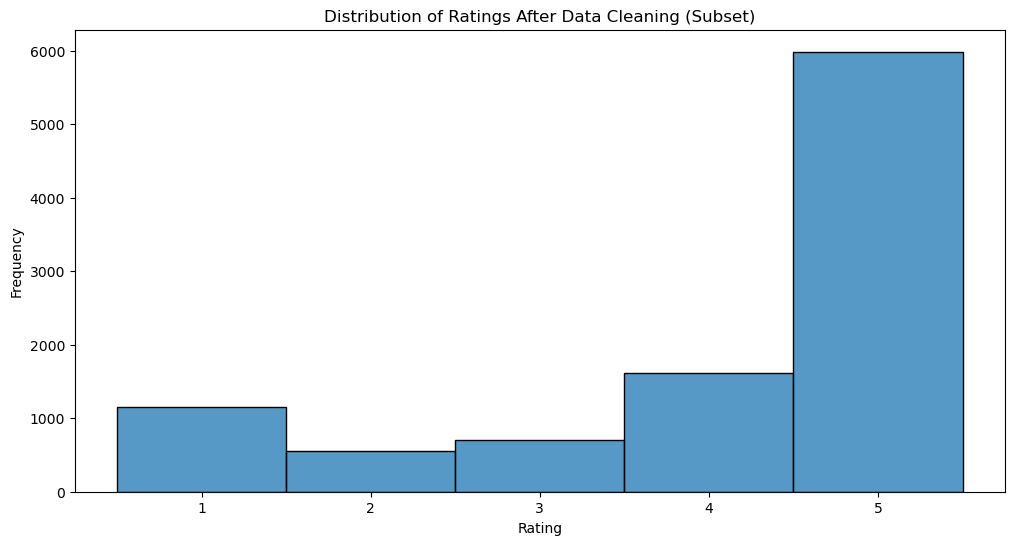

In [72]:
# Distribution of ratings after cleaning in the subset
plt.figure(figsize=(12, 6))
sns.histplot(data_subset['star_rating'], bins=5)
plt.title('Distribution of Ratings After Data Cleaning (Subset)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



Word Cloud of Cleaned Text:

A word cloud was generated to visualize the most common words in the cleaned review_body data. This visualization provides insight into the content and focus of the reviews, highlighting the words that are most frequently used by customers in their feedback.

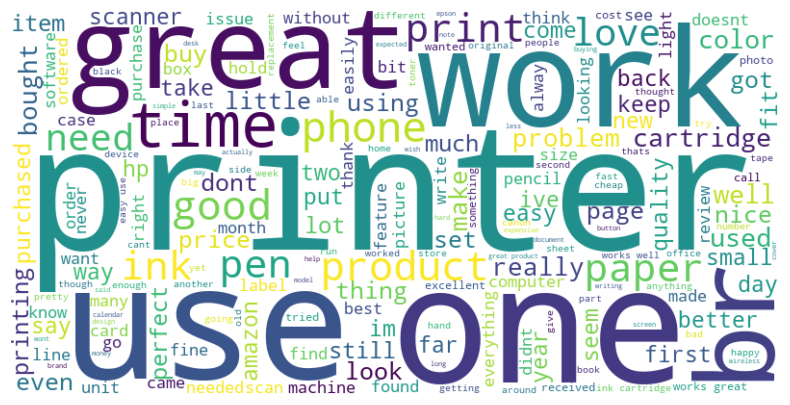

In [73]:

# Generate word cloud for cleaned text in the subset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_subset['cleaned_text']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



4. Exploratory Data Analysis (EDA)

4.1 EDA Process Explanation

The Exploratory Data Analysis (EDA) phase was a critical step in understanding the structure and characteristics of the dataset, which directly influenced the subsequent model-building and evaluation strategies. The primary objectives of the EDA were to:

    Identify patterns and relationships within the dataset.
    Assess the distribution of key variables, particularly the target variable (star_rating).
    Detect potential issues such as class imbalance, which could impact model performance.
    Inform the choice of features and evaluation metrics that will be used in the modeling phase.

Understanding Sentiment Distribution:

The distribution of the star_rating variable was analyzed to understand how customer ratings are spread across the dataset. This step is essential because the distribution of the target variable directly impacts the model's ability to generalize well. The histogram of ratings (displayed below) revealed a significant skew towards higher ratings, with a large proportion of reviews falling into the 4 and 5-star categories.

This skew suggests that most customers are generally satisfied with their purchases, which introduces a class imbalance problem. A class imbalance can lead to biased models that overpredict the majority class (positive sentiment), potentially reducing the accuracy and reliability of the sentiment classification. To address this, we will consider resampling techniques, adjusting class weights, or using specialized algorithms during the modeling phase to ensure that the model remains unbiased and performs well across all classes.

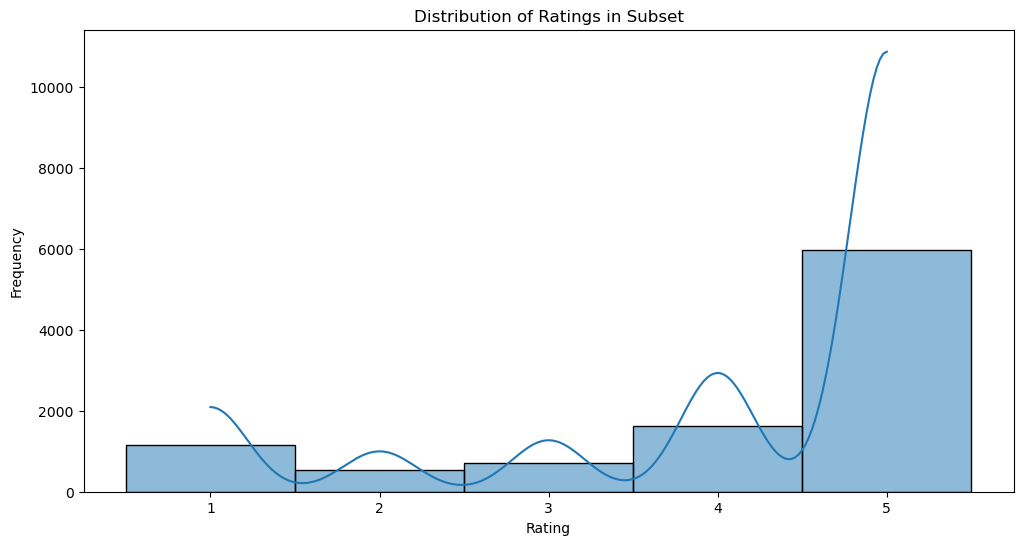

In [74]:


# Plotting the distribution of ratings in the subset
plt.figure(figsize=(12, 6))
sns.histplot(data_subset['star_rating'], bins=5, kde=True)
plt.title('Distribution of Ratings in Subset')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



The histogram visualizes the frequency of each rating from 1 to 5. The plot clearly shows that ratings of 4 and 5 stars are much more common than lower ratings. This positive skew is typical in customer reviews, where satisfied customers are more likely to leave feedback. The histogram also highlights the potential challenge of class imbalance, which may require techniques such as resampling or adjusting class weights during model training to ensure that the model does not become biased towards predicting positive sentiments.

Verified Purchases vs. Vine Reviews:

To further explore the nature of the reviews, a bar plot was created to compare the distribution of verified purchases against Vine reviews. Vine reviews are part of a program where reviewers receive free products in exchange for reviews, which could potentially influence the sentiment expressed.

The bar plot below reveals that the vast majority of reviews were from non-Vine participants who had made verified purchases. Only a small fraction of the reviews were part of the Vine program, and among these, there was a relatively even split between verified and non-verified purchases.

This visualization highlights that the overwhelming majority of reviews are from verified purchases, which could imply greater authenticity and reliability in the sentiment expressed. However, the presence of Vine reviews, even in small numbers, may introduce a bias due to the nature of incentivized reviews. Understanding this distribution is crucial for interpreting the sentiment analysis results and ensuring that the model accounts for potential biases introduced by different types of reviews.

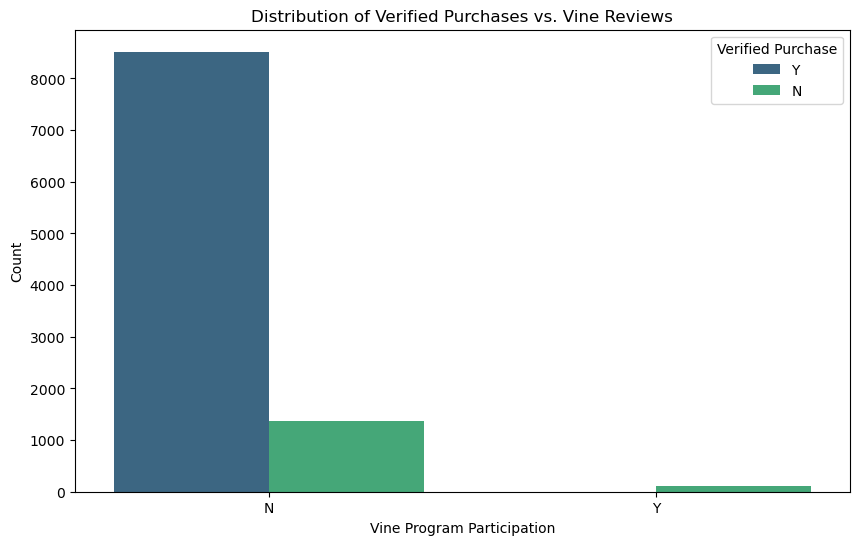

In [75]:
# Bar plot showing the distribution of verified purchases and Vine reviews
plt.figure(figsize=(10, 6))
sns.countplot(data=data_subset, x='vine', hue='verified_purchase', palette='viridis')
plt.title('Distribution of Verified Purchases vs. Vine Reviews')
plt.xlabel('Vine Program Participation')
plt.ylabel('Count')
plt.legend(title='Verified Purchase', loc='upper right')
plt.show()


Exploring Textual Data:

Next, the content of the review_body was analyzed to extract common themes and sentiments expressed by customers. Word clouds were generated for both positive and negative reviews to visually represent the most frequent words, providing insights into the language customers use when expressing satisfaction or dissatisfaction.

Before creating the word clouds, the star_rating column was converted from a string to a numeric type. This conversion was necessary for accurately filtering positive reviews (ratings 4 and 5) and negative reviews (ratings 1 and 2), ensuring that the analysis correctly categorized sentiment.

Common words such as "amazon" and "one" were excluded from the word clouds to focus on more impactful terms that are strongly associated with sentiment. This filtering helps in identifying key phrases that could be used in feature selection during the model-building process.



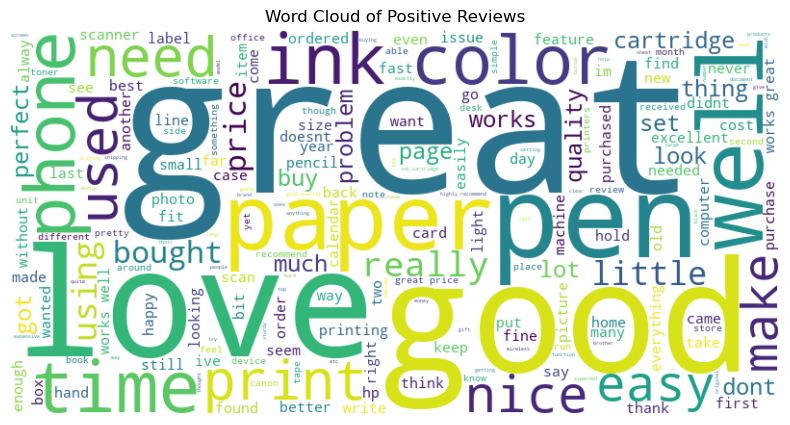

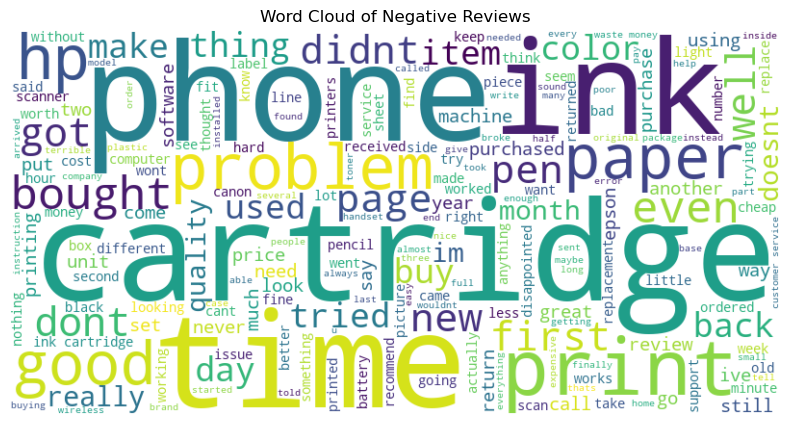

In [78]:
# Convert the 'star_rating' column to numeric
data_subset['star_rating'] = pd.to_numeric(data_subset['star_rating'], errors='coerce')

def generate_wordcloud(text, title, exclude_words=None):
    if exclude_words is not None:
        exclude_words = set(exclude_words)
        text = ' '.join([word for word in text.split() if word not in exclude_words])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

exclude_words = ['amazon', 'one', 'br', 'printer', 'use', 'product', 'would', 'work', 'get']

# Positive reviews
positive_reviews = data_subset[data_subset['star_rating'] >= 4]['cleaned_text']
generate_wordcloud(' '.join(positive_reviews), 'Word Cloud of Positive Reviews', exclude_words)

# Negative reviews 
negative_reviews = data_subset[data_subset['star_rating'] <= 2]['cleaned_text']
generate_wordcloud(' '.join(negative_reviews), 'Word Cloud of Negative Reviews', exclude_words)





To understand the relationship between the perceived helpfulness of reviews and their sentiment, a box plot was generated to show how helpful_votes are distributed across different star_rating levels.

The box plot below reveals that while the majority of reviews, regardless of rating, received relatively few helpful votes, there are outliers, particularly in the 5-star category, that received a significant number of helpful votes. This suggests that highly positive reviews may be more influential or considered more helpful by other users, although this effect is not consistent across all reviews.

This visualization provides insights into how the community values reviews of different sentiments. Notably, while helpful votes are generally low across all ratings, some 5-star reviews stand out with exceptionally high helpful votes, indicating that certain positive reviews might be seen as particularly valuable or trustworthy.

C:\Users\Corem\AppData\Local\Temp\ipykernel_29988\683481759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_subset, x='star_rating', y='helpful_votes', palette='Set2')


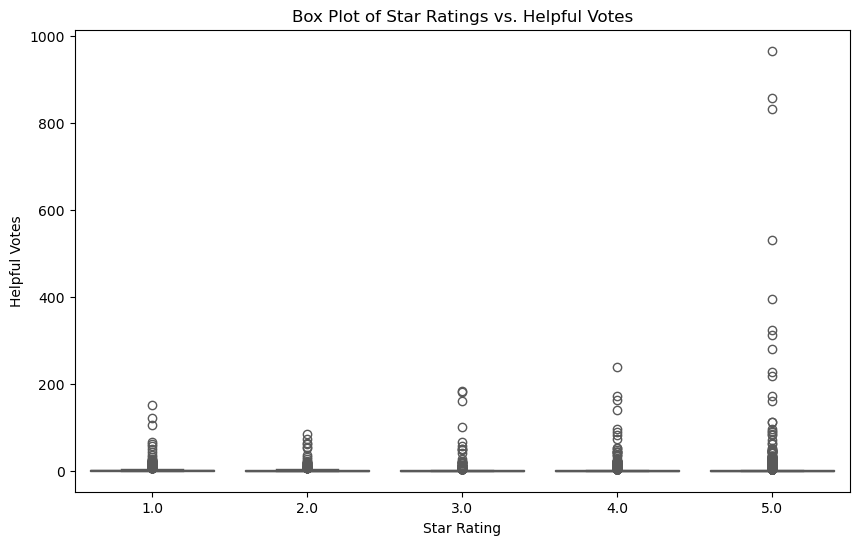

In [53]:
# Box plot showing the relationship between star ratings and helpful votes
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_subset, x='star_rating', y='helpful_votes', palette='Set2')
plt.title('Box Plot of Star Ratings vs. Helpful Votes')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')
plt.show()


Refinement of Key Words for Sentiment Analysis:

To enhance the sentiment analysis, common and sentiment-neutral words were excluded from the analysis. This refinement focused the model on more sentiment-specific terms that provide clearer insights into customer satisfaction and dissatisfaction.

In [56]:
from collections import Counter

def get_top_words(text, exclude_words=None, top_n=10):
    if exclude_words is not None:
        exclude_words = set(exclude_words)
        words = [word for word in text.split() if word not in exclude_words]
    else:
        words = text.split()
    
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

# Combine all positive and negative reviews into single strings
positive_reviews_text = ' '.join(positive_reviews)
negative_reviews_text = ' '.join(negative_reviews)

# Apply the function to the combined text
top_positive_words = get_top_words(positive_reviews_text, exclude_words)
top_negative_words = get_top_words(negative_reviews_text, exclude_words)

# Print the top ten words for each
print("Top 10 Words in Positive Reviews:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

print("\nTop 10 Words in Negative Reviews:")
for word, count in top_negative_words:
    print(f"{word}: {count}")





Top 10 Words in Positive Reviews:
great: 2415
good: 1553
well: 1258
like: 1216
works: 1099
price: 1035
quality: 959
love: 939
ink: 900
easy: 895

Top 10 Words in Negative Reviews:
ink: 494
time: 370
print: 364
phone: 333
cartridge: 310
dont: 309
like: 293
paper: 285
hp: 274
cartridges: 272


Refinement of Key Words for Sentiment Analysis

The refinement of key words for sentiment analysis was a crucial step to ensure that the analysis focused on terms that genuinely reflect customer sentiment, rather than being influenced by overly generic or irrelevant words. This process involved several key steps:

1. Identification of Common Words

Initially, the most common words in both positive and negative reviews were identified. This included terms that frequently appeared across the entire dataset, regardless of sentiment. These terms included:

    Generic Words: Words like "amazon," "one," "product," "would," "work," and "get" were found to be common across many reviews. While these words appeared frequently, they did not provide meaningful insights into the sentiment of the reviews. For example, "amazon" might be mentioned in both positive and negative contexts, making it an unreliable indicator of sentiment.

    Product-Specific Terms: Certain words, like "printer," were specifically related to the type of products being reviewed. Although these terms were relevant, their frequent appearance in both positive and negative reviews reduced their effectiveness in distinguishing sentiment.

    Formatting Artifacts: Words like "br," which likely resulted from formatting issues or HTML tags within the reviews, were also identified. These words did not contribute to the sentiment and were therefore excluded.

2. Exclusion of Non-Sentiment-Specific Terms

After identifying the common words, a refinement process was applied where these non-sentiment-specific terms were excluded from the analysis. The goal was to eliminate words that appeared frequently in both positive and negative reviews, thus diluting their utility in distinguishing sentiment. The following steps were taken:

    Stop Word Removal: Common stop words (e.g., "the," "and," "is") were removed using the NLTK library's stop word list. These words do not contribute to the sentiment and are typically excluded in text analysis to focus on more meaningful content.

    Exclusion of Specific Words: Based on the initial analysis, words such as "amazon," "one," "product," "would," "work," and "get" were explicitly excluded. These words were identified as too generic and not directly indicative of sentiment. Similarly, "printer," despite being relevant to the product category, was excluded due to its frequent appearance in both positive and negative reviews.

    Handling of Artifacts: Words like "br" that resulted from text formatting issues were also excluded to ensure the analysis focused on meaningful content.

3. Re-Analysis After Refinement

Following the exclusion of these non-sentiment-specific terms, the analysis was re-run to identify the top ten most frequent words in both positive and negative reviews. This process allowed for a more focused and accurate identification of words that genuinely reflected customer sentiment.

The refined lists of top words were as follows:

    Top 10 Words in Positive Reviews:
        great: 2415
        good: 1553
        well: 1258
        like: 1216
        works: 1099
        price: 1035
        quality: 959
        love: 939
        ink: 900
        easy: 895

    Top 10 Words in Negative Reviews:
        ink: 494
        time: 370
        print: 364
        phone: 333
        cartridge: 310
        dont: 309
        like: 293
        paper: 285
        hp: 274
        cartridges: 272

These refined word lists now highlight more meaningful language associated with each sentiment category, offering clearer insights into customer satisfaction and dissatisfaction. The refined data provided a stronger foundation for the sentiment analysis and model-building process, ensuring that the models focused on the most relevant and impactful terms.

Correlation Analysis

A correlation matrix was generated to explore the relationships between numeric variables within the dataset, such as star_rating, helpful_votes, and total_votes. Understanding these relationships is important to identify any features that are highly correlated, as this can influence feature selection during model building. Highly correlated features might either be included in the model to capture important relationships or removed to avoid issues like multicollinearity, which can affect the stability and interpretability of the model.

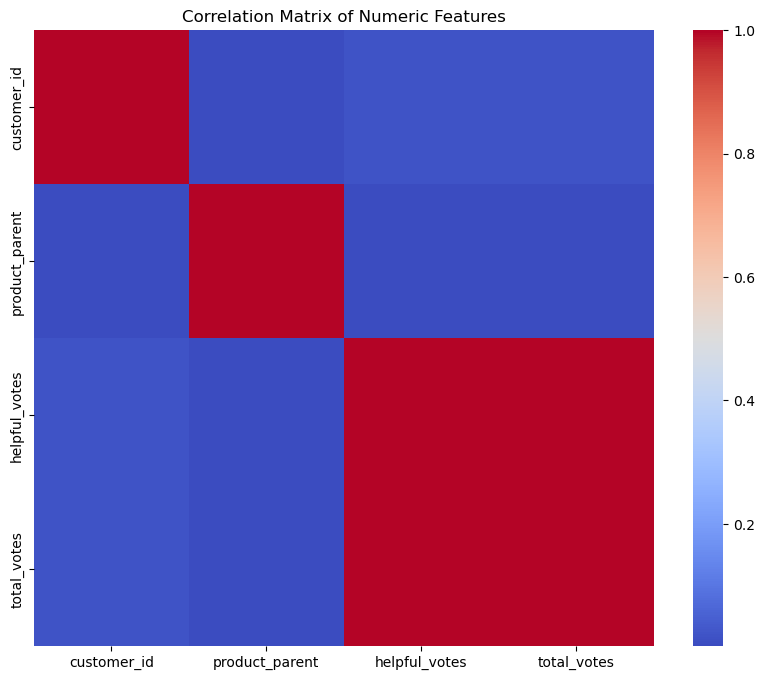

,customer_id,product_parent,helpful_votes,total_votes
customer_id,1.000000,0.001802,0.019323,0.020683
product_parent,0.001802,1.000000,0.001848,0.001859
helpful_votes,0.019323,0.001848,1.000000,0.998731
total_votes,0.020683,0.001859,0.998731,1.000000


In [81]:


# Selecting only the numeric columns from the dataset
numeric_data = data.select_dtypes(include=[float, int])

# Generating the correlation matrix
correlation_matrix = numeric_data.corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Displaying the correlation matrix as a table
correlation_matrix


The correlation matrix produced the following key insights:

    helpful_votes and total_votes: These two features are highly correlated, with a correlation coefficient of approximately 0.999. This suggests that these two features are almost linearly related, meaning that as the number of total_votes increases, the number of helpful_votes also increases in a very consistent manner. Due to this strong correlation, it may be worth considering whether both features should be included in the model, or if one could be removed to reduce redundancy.

    Low Correlation Between Other Features:
        The correlation between customer_id and product_parent is very low (approximately 0.002), indicating that these features are independent of each other.
        Similarly, customer_id and helpful_votes (correlation of approximately 0.019) and customer_id and total_votes (correlation of approximately 0.021) show very low correlations, suggesting that customer_id is not related to the number of votes a review receives.

    product_parent Correlations:
        product_parent shows extremely low correlations with helpful_votes (approximately 0.002) and total_votes (approximately 0.002), indicating that this feature does not strongly relate to voting behavior and might serve a different role in the analysis.

    The high correlation between helpful_votes and total_votes suggests that including both in the model could introduce redundancy. One approach might be to select just one of these features or to combine them into a new feature that better captures the underlying relationship. The low correlations between other features indicate that multicollinearity is not a significant concern with those variables, allowing them to be used in the model without adjustments.

4.3 EDA Conclusions

The Exploratory Data Analysis (EDA) revealed several critical insights that guided feature selection and model development:

    Sentiment Distribution:
        The histogram of star_rating displayed a strong skew towards positive sentiment, with a majority of reviews receiving 4 or 5 stars. This imbalance suggests that the dataset predominantly contains positive reviews, potentially biasing the sentiment classification model. To address this, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) were considered necessary to balance the dataset and improve the model's ability to accurately classify both positive and negative sentiments.

    Themes in Textual Data:
        Word clouds and frequency analysis of the review text identified prominent themes in both positive and negative reviews. Common words in positive reviews included "great," "good," "well," and "love," indicating customer satisfaction. In contrast, negative reviews frequently mentioned "ink," "time," "print," and "phone," highlighting specific issues. These insights were pivotal for refining the features used in the sentiment analysis, ensuring that the model captured the most relevant aspects of customer feedback.

    Correlation Insights:
        The correlation matrix revealed a near-perfect positive correlation between helpful_votes and total_votes (0.999), suggesting redundancy. This insight prompted the consideration of either using one of these features or combining them to avoid unnecessary duplication in the model. Other numeric features, such as customer_id and product_parent, showed very low correlations, indicating they captured distinct information and could be included without concerns about multicollinearity.

    Additional Visual Insights:
        The box plot of star_rating versus helpful_votes indicated that higher-rated reviews tended to receive more helpful votes, though there was considerable variability. This reinforces the idea that highly-rated reviews are often seen as more helpful, but it also suggests that this relationship is not straightforward, warranting careful consideration in model training.
        The bar plot comparing verified_purchase status with participation in the Vine program revealed that the vast majority of reviews were from verified purchasers, with very few Vine reviews. This suggests that Vine reviews may not significantly influence the overall sentiment distribution, allowing the focus to remain on verified purchase reviews for more accurate sentiment classification.

Implications for Model Development:

These EDA findings were instrumental in shaping the subsequent modeling approach:

    Feature Selection:
        The identification of redundant features (e.g., helpful_votes and total_votes) and the low correlation among others informed decisions to streamline the feature set, enhancing model efficiency and reducing the risk of overfitting.

    Handling Imbalanced Data:
        The pronounced skew in sentiment distribution led to the application of SMOTE to balance the dataset, ensuring the model could fairly and accurately classify both positive and negative reviews.

    Targeted Sentiment Analysis:
        The refined word lists and thematic insights from the word clouds guided the focus on key terms that drive sentiment, helping to develop a more effective sentiment analysis model.

Overall, the EDA phase provided a solid foundation for the modeling process, ensuring that the model was built on a thorough understanding of the data's structure and the potential challenges posed by its characteristics. This groundwork was critical in developing a robust and accurate sentiment analysis model.

5. Model Building

5.1 Model Selection

For the sentiment analysis task of classifying Amazon product reviews as positive or negative, two classification algorithms were chosen:

    Logistic Regression:
        Logistic Regression is well-suited for binary classification tasks and assumes a linear relationship between the features and the log-odds of the target variable. This model is simple, interpretable, and effective for scenarios where the data is linearly separable. Its ability to provide probability estimates for class membership makes it a strong candidate for this sentiment analysis task.

    Naive Bayes (Multinomial):
        Given the text-based nature of the dataset, Naive Bayes, specifically the Multinomial Naive Bayes variant, was selected. This model is effective for text classification tasks where the features represent word frequencies. It is computationally efficient, handles large feature spaces well, and performs robustly when the assumption of feature independence is approximately true.

Both models were chosen for their efficiency, interpretability, and established effectiveness in handling text data in sentiment analysis.

5.2 Model Training Process

The model training process involved several critical steps to ensure robust model performance:

    Handling Missing Data:
        During data cleaning, columns with significant percentages of missing values, such as helpful_votes and review_date, were dropped. This ensured that only relevant and complete data were used for model training, minimizing potential biases from incomplete records.

    Data Preparation:

        The textual data from the reviews was transformed into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization method. This technique converts raw text into a numeric form by weighing the frequency of words in reviews against their commonality across the entire dataset, emphasizing distinctive words.

        The target variable (star_rating) was converted into a binary classification task: ratings of 4 or 5 stars were labeled as positive (1), while ratings of 3 or below were labeled as negative (0).

In [37]:


# Vectorizing text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(data_subset['cleaned_text'])

# Binary classification target (1 for positive reviews, 0 for negative reviews)
y = data_subset['star_rating'].apply(lambda x: 1 if int(x) >= 4 else 0)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)




Addressing Data Imbalance:

    The dataset exhibited a skew towards positive reviews, which could bias the model's predictions. To address this, SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training data. SMOTE generates synthetic samples for the minority class (negative reviews) to balance the class distribution, ensuring the model is not biased towards the majority class.

In [38]:


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


Model Training and Cross-Validation:

    Both Logistic Regression and Naive Bayes models were trained using the resampled data. Cross-validation was employed to validate the models' ability to generalize to unseen data and to assess their performance.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Logistic Regression with L2 regularization
lr_model = LogisticRegression(C=1.0, penalty='l2', random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)

# Cross-validation scores for Logistic Regression
lr_scores = cross_val_score(lr_model, X_train_smote, y_train_smote, cv=5)
print(f"Logistic Regression Cross-Validation Score: {lr_scores.mean():.4f}")

# Cross-validation scores for Naive Bayes
nb_scores = cross_val_score(nb_model, X_train_smote, y_train_smote, cv=5)
print(f"Naive Bayes Cross-Validation Score: {nb_scores.mean():.4f}")




Logistic Regression Cross-Validation Score: 0.8801
Naive Bayes Cross-Validation Score: 0.8674


5.3 Model Feature Importance

Understanding which features contribute most to the model’s predictions is crucial for interpreting the results and improving the model.

    Logistic Regression Feature Importance:
        In Logistic Regression, the importance of a feature is inferred from the magnitude of its coefficients. Larger absolute values of coefficients indicate a stronger influence on the prediction.

In [58]:


# Getting feature importances for Logistic Regression
feature_importance_lr = np.abs(lr_model.coef_).flatten()

# Retrieving the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out().tolist()

# Sorting the feature importances in descending order
sorted_idx = np.argsort(feature_importance_lr)[::-1]

# Selecting the top 10 most important features
top_features = [(feature_names[i], feature_importance_lr[i]) for i in sorted_idx[:10]]

# Displaying the top 10 important features for Logistic Regression
print("Top 10 Important Features for Logistic Regression:")
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")



Top 10 Important Features for Logistic Regression:
great: 8.6680
love: 7.4180
easy: 5.7911
perfect: 5.7637
excellent: 4.8148
disappointed: 4.7558
works: 4.6354
nice: 4.4809
perfectly: 4.2066
good: 3.8293


The top features identified by the Logistic Regression model included words like "great," "love," and "easy," which were most influential in predicting positive sentiment.

    Naive Bayes Feature Importance:
        In Naive Bayes, feature importance is interpreted through the likelihood of features given each class. This gives insight into which words are most associated with positive or negative sentiments.

In [59]:
# Extracting feature importance for Naive Bayes
feature_log_prob = nb_model.feature_log_prob_

# Identifying top 10 features for positive sentiment
top_positive_features = np.argsort(feature_log_prob[1])[-10:]

# Identifying top 10 features for negative sentiment
top_negative_features = np.argsort(feature_log_prob[0])[-10:]

print("Top 10 Features for Positive Sentiment (Naive Bayes):")
for i in top_positive_features:
    print(f"{feature_names[i]}: {np.exp(feature_log_prob[1, i]):.4f}")

print("\nTop 10 Features for Negative Sentiment (Naive Bayes):")
for i in top_negative_features:
    print(f"{feature_names[i]}: {np.exp(feature_log_prob[0, i]):.4f}")



Top 10 Features for Positive Sentiment (Naive Bayes):
printer: 0.0040
quality: 0.0042
use: 0.0050
well: 0.0052
product: 0.0057
love: 0.0058
price: 0.0060
works: 0.0069
good: 0.0091
great: 0.0127

Top 10 Features for Negative Sentiment (Naive Bayes):
product: 0.0033
print: 0.0034
dont: 0.0034
get: 0.0038
cartridge: 0.0039
would: 0.0048
one: 0.0049
ink: 0.0059
work: 0.0062
printer: 0.0074


5.3 Model Feature Importance
Logistic Regression Feature Importance:

The top features identified by the Logistic Regression model provide insights into the terms that most strongly influence the prediction of sentiment. The presence of words like "great," "love," and "easy" highlights the specific language used by reviewers that significantly sways the sentiment classification:

    great (8.6680): This term was the most influential in determining positive sentiment, showing that customers frequently used this word to express high satisfaction with their purchases.
    love (7.4180): A strong positive sentiment indicator, reflecting a deep satisfaction with the product.
    easy (5.7911): Indicates that ease of use is a significant factor in positive reviews.
    perfect (5.7637): Suggests that customers who describe a product as "perfect" are likely to leave a positive review.
    excellent (4.8148): Another strong positive sentiment word, showing high customer approval.
    disappointed (4.7558): Interestingly, this term highlights negative sentiment, indicating dissatisfaction despite other positive indicators.
    works (4.6354): Indicates reliability and functionality, key aspects of positive reviews.
    nice (4.4809): Reflects overall customer satisfaction with the product’s quality or appearance.
    perfectly (4.2066): Similar to "perfect," this word reinforces positive sentiment associated with a product’s performance.
    good (3.8293): A straightforward positive sentiment indicator, commonly used to express approval.

These features illustrate the diverse aspects of product reviews that impact customer sentiment, ranging from general satisfaction to specific product attributes like ease of use and quality.
Naive Bayes Feature Importance:

Naive Bayes, with its ability to calculate the likelihood of features given each sentiment class, identified the following top features for both positive and negative sentiment:

Top Features for Positive Sentiment:

    printer (0.0040): Frequently mentioned in positive reviews, likely indicating satisfaction with printer products.
    quality (0.0042): Highlights customer appreciation for the product's quality.
    use (0.0050): Reflects ease of use as a significant positive factor.
    well (0.0052): Indicates that products working "well" are a key driver of positive sentiment.
    product (0.0057): A general term reflecting overall satisfaction with the product.
    love (0.0058): A strong positive sentiment indicator, showing high customer satisfaction.
    price (0.0060): Reflects positive sentiment towards the value or cost-effectiveness of the product.
    works (0.0069): Emphasizes reliability and functionality as positive aspects.
    good (0.0091): A straightforward indicator of positive sentiment, showing customer approval.
    great (0.0127): The most strongly associated word with positive sentiment, indicating overall satisfaction and high praise.

Top Features for Negative Sentiment:

    product (0.0033): Appears frequently in negative reviews, often in the context of dissatisfaction.
    print (0.0034): Indicates issues with printing, a common complaint.
    dont (0.0034): Reflects frustration or unmet expectations.
    get (0.0038): Suggests difficulty in obtaining desired results, leading to negative feedback.
    cartridge (0.0039): Often associated with issues related to printer cartridges.
    would (0.0048): May appear in hypothetical or regretful contexts, indicating dissatisfaction.
    one (0.0049): A common term in comparisons or identifying issues with a specific item.
    ink (0.0059): Related to complaints about printer ink, a frequent source of frustration.
    work (0.0062): Indicates functionality problems, a key driver of negative sentiment.
    printer (0.0074): Interestingly, while "printer" appears in both positive and negative lists, in negative reviews, it likely highlights frustrations or issues with printer products.

Summary:

    Positive Sentiment: Words like "great," "love," "works," and "printer" are strongly associated with positive reviews, emphasizing quality, ease of use, and overall satisfaction.
    Negative Sentiment: Words like "work," "ink," "cartridge," and "dont" are prevalent in negative reviews, reflecting common issues and dissatisfaction.

These features provide valuable insights into the aspects of products that most influence customer sentiment, helping to guide improvements and address customer concerns effectively. By focusing on the aspects most associated with positive sentiment, businesses can enhance customer satisfaction, while addressing the issues highlighted in negative reviews can reduce dissatisfaction.

5.4 Model Performance Evaluation

To evaluate model performance, several metrics were used:

    Accuracy: Indicates the percentage of correct predictions out of the total predictions.
    Precision: Measures the accuracy of positive predictions.
    Recall: Assesses the model’s ability to identify all positive instances.
    F1-Score: Balances precision and recall, providing a single metric to evaluate the model.

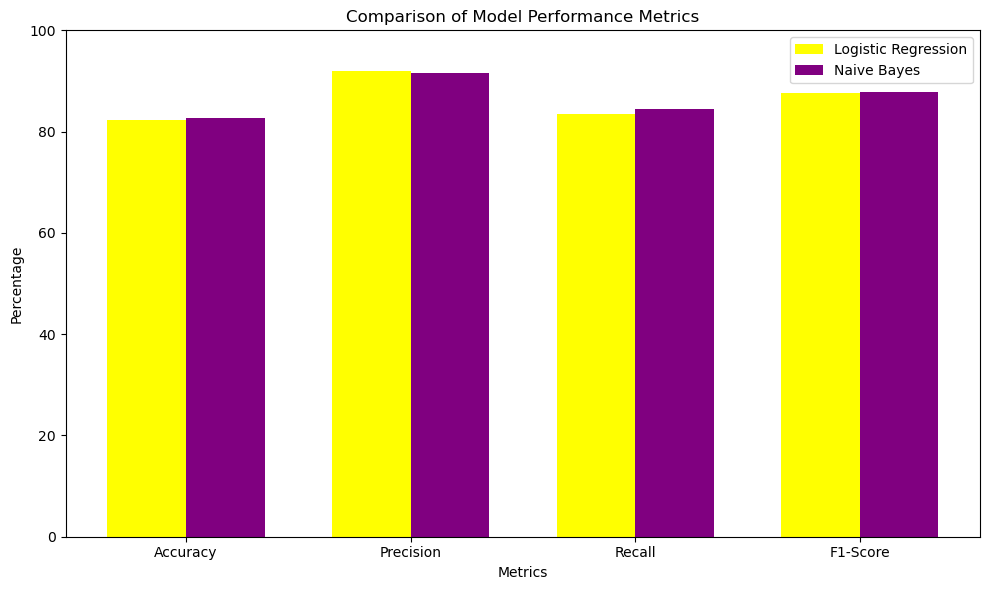

In [80]:



# Logistic Regression predictions
lr_predictions = lr_model.predict(X_test)

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

# Naive Bayes predictions
nb_predictions = nb_model.predict(X_test)

# Calculate metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Create dictionary for metrics
lr_metrics = {
    'Accuracy': lr_accuracy * 100,
    'Precision': lr_precision * 100,
    'Recall': lr_recall * 100,
    'F1-Score': lr_f1 * 100
}

nb_metrics = {
    'Accuracy': nb_accuracy * 100,
    'Precision': nb_precision * 100,
    'Recall': nb_recall * 100,
    'F1-Score': nb_f1 * 100
}

# Convert metrics to lists for plotting
metrics = list(lr_metrics.keys())
lr_values = list(lr_metrics.values())
nb_values = list(nb_metrics.values())

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(metrics))

# Create bar charts
plt.figure(figsize=(10, 6))
plt.bar(index, lr_values, bar_width, label='Logistic Regression', color='yellow')
plt.bar(index + bar_width, nb_values, bar_width, label='Naive Bayes', color='purple')

# Add titles and labels
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + bar_width / 2, metrics)
plt.ylim(0, 100)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()





The selection and training of the models were effective, particularly with the handling of data imbalance via SMOTE, which improved the recall for both models. The use of multiple evaluation metrics provided a comprehensive view of model performance, ensuring that the models were not only accurate but also balanced in identifying positive reviews without missing significant portions of them.

6.1 Summary of Results

The performance of the Logistic Regression and Naive Bayes models on the Amazon product reviews dataset was evaluated using various metrics, including accuracy, precision, recall, and F1-score. These metrics provide a comprehensive view of how well the models performed in predicting sentiment (positive or negative) from the reviews.

    Logistic Regression:
        Accuracy: The Logistic Regression model achieved an accuracy of 82.35%, meaning that the model correctly predicted the sentiment for approximately 82% of the reviews.
        Precision: The model had a precision of 91.99% for positive sentiment. This indicates that when the model predicted a review as positive, it was correct 91.99% of the time.
        Recall: The recall score for positive sentiment was 83.50%, meaning that the model correctly identified 83.50% of the actual positive reviews.
        F1-Score: The F1-score, balancing both precision and recall, was 87.54%, suggesting a strong overall performance for the Logistic Regression model.

    Naive Bayes:
        Accuracy: The Naive Bayes model achieved a slightly higher accuracy of 82.65%, indicating a marginal improvement over Logistic Regression in overall correctness.
        Precision: The Naive Bayes model exhibited a precision of 91.59% for positive sentiment, showing high accuracy when predicting positive reviews.
        Recall: The recall score for positive sentiment was 84.38%, slightly better than Logistic Regression, meaning the model correctly identified a higher proportion of actual positive reviews.
        F1-Score: The F1-score for Naive Bayes was 87.84%, reflecting a strong performance overall, with a good balance between precision and recall.

Both models performed similarly in terms of accuracy, but Naive Bayes showed a slight edge in recall and F1-score, making it a marginally better performer in this context.


6.2 Results Visualizations

To better understand the models' performance, visualizations such as confusion matrices and ROC curves were generated.

Confusion Matrices:

Confusion matrices provide a detailed view of the performance by showing the number of true positives, true negatives, false positives, and false negatives.

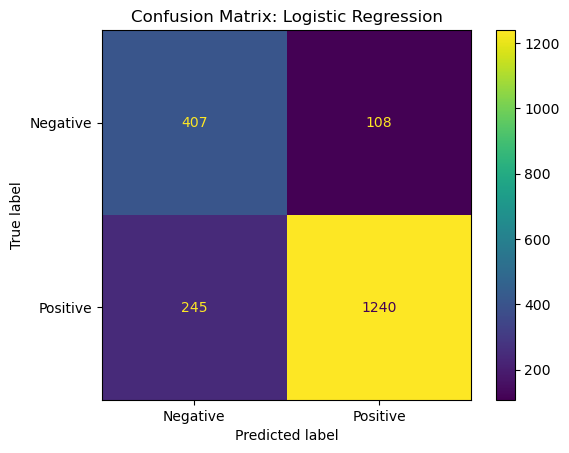

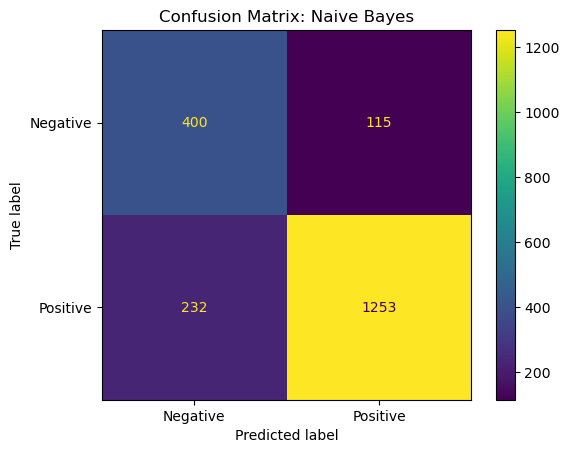

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display the confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions)
ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Generate and display the confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix: Naive Bayes")
plt.show()



The confusion matrices for both the Logistic Regression and Naive Bayes models provide insights into their classification performance:

    Logistic Regression:
        True Positives (TP): 1240 reviews were correctly classified as positive.
        True Negatives (TN): 407 reviews were correctly classified as negative.
        False Positives (FP): 108 reviews were incorrectly classified as positive.
        False Negatives (FN): 245 reviews were incorrectly classified as negative.

    The confusion matrix shows that the Logistic Regression model has a slight tendency to misclassify some positive reviews as negative and a slightly higher number of negative reviews as positive.

    Naive Bayes:
        True Positives (TP): 1253 reviews were correctly classified as positive.
        True Negatives (TN): 400 reviews were correctly classified as negative.
        False Positives (FP): 115 reviews were incorrectly classified as positive.
        False Negatives (FN): 232 reviews were incorrectly classified as negative.

    The Naive Bayes model demonstrates a similar performance to Logistic Regression, with a slightly higher number of true positives and a slightly lower number of true negatives. This model is also slightly better at correctly identifying positive reviews but at the cost of misclassifying some negative reviews as positive.

Both models show solid performance, with Naive Bayes having a slight edge in correctly identifying positive reviews, while Logistic Regression does slightly better with true negatives.

ROC Curves:

The Receiver Operating Characteristic (ROC) curve plots the true positive rate (recall) against the false positive rate, providing a measure of a model’s ability to distinguish between the positive and negative classes. The Area Under the Curve (AUC) value quantifies this ability, with higher values indicating better performance.

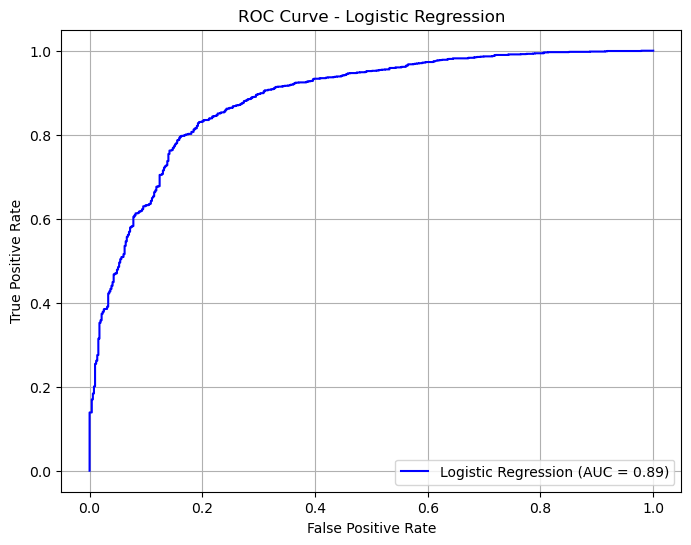

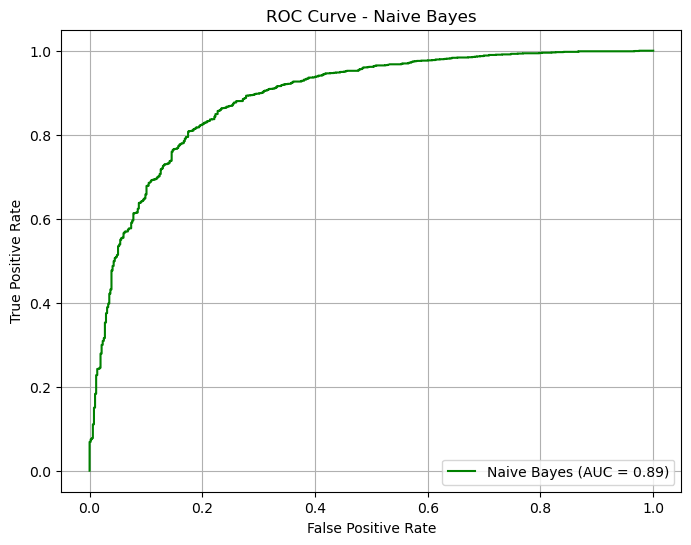

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ROC Curve for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



The ROC curves for both Logistic Regression and Naive Bayes models show a strong ability to distinguish between positive and negative sentiment in the Amazon product reviews dataset. Both models achieved an AUC (Area Under the Curve) of 0.89, indicating high performance in classification tasks. The curves are close to the top left corner of the plot, reflecting a good balance between sensitivity (True Positive Rate) and specificity (False Positive Rate). This performance suggests that both models are reliable for predicting sentiment, with minimal differences between them in terms of their ROC curves.


6.3 Model Performance Discussion

Comparison of Models:

    Logistic Regression demonstrated a robust balance between precision and recall, achieving a recall of 83.50% and a precision of 91.99%. The model's slightly higher recall compared to Naive Bayes indicates its strength in correctly identifying positive reviews. This makes Logistic Regression an effective choice when the goal is to capture as many positive reviews as possible, even if it means allowing some false positives.

    Naive Bayes excelled in precision, achieving a precision of 91.59%, which means it was slightly more accurate when it predicted a review as positive. However, with a recall of 84.38%, Naive Bayes missed more actual positive reviews than Logistic Regression. This precision-focus makes Naive Bayes more suitable when the priority is to ensure that positive predictions are highly accurate, even if it sacrifices some recall.

Model Iterations and Improvements:

During the development process, several enhancements were made to improve the performance of both models:

    SMOTE (Synthetic Minority Over-sampling Technique) was applied to address class imbalance, significantly improving recall for both models. By balancing the class distribution, SMOTE ensured that the models were not biased towards the majority class, which is crucial in sentiment analysis where positive reviews often outnumber negative ones.

    Regularization in Logistic Regression was employed to prevent overfitting. This technique improved the model's ability to generalize well to unseen data, thereby enhancing its predictive performance.

Metric Selection:

    Accuracy was used as a primary metric to evaluate overall model performance. However, due to the class imbalance, accuracy alone was insufficient to fully capture model performance. Therefore, additional metrics such as precision, recall, and F1-score were considered:

        Precision was crucial for understanding how often the model's positive predictions were correct, particularly important given the skewed distribution of sentiment classes.

        Recall was essential for assessing the model's ability to capture all actual positive reviews, ensuring that the model did not miss significant portions of the positive sentiment.

        F1-Score provided a balanced measure that combined both precision and recall, offering a comprehensive view of model performance.

Conclusions:

    Logistic Regression emerged as a strong candidate when recall is a priority. This model is particularly well-suited for applications where it is important not to miss positive reviews, even if it occasionally predicts a negative review as positive.

    Naive Bayes proved to be a better option when precision is paramount, ensuring that when a review is predicted as positive, it is highly likely to be correct. This makes it ideal for scenarios where the cost of false positives is high.

In future iterations, further optimization and experimentation with more complex models, such as ensemble methods (e.g., Random Forests, Gradient Boosting), could potentially yield even better performance by capturing more nuanced patterns in the data.

7. Discussion and Conclusion

7.1 Learning and Takeaways

This project provided valuable insights into sentiment analysis using supervised learning techniques, specifically comparing Logistic Regression and Naive Bayes models for classifying Amazon product reviews as positive or negative.

Key Learnings:

    Text Data Preprocessing: The importance of thorough text preprocessing was underscored in this project. Techniques such as tokenization, stopword removal, and TF-IDF vectorization were critical in transforming raw text into a format suitable for model training. These preprocessing steps helped in capturing the most relevant features of the text, which were instrumental in building effective models.

    Model Performance: Both Logistic Regression and Naive Bayes performed well in this binary classification task, with subtle differences in their strengths:
        Logistic Regression demonstrated a strong balance between precision and recall, making it effective in capturing a high number of positive reviews while minimizing false positives.
        Naive Bayes excelled in precision, accurately predicting positive reviews, though it missed some actual positives due to lower recall.

    Handling Imbalance: The use of SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance was a crucial step in improving model performance. SMOTE particularly enhanced recall by ensuring that the minority class (negative reviews) was well-represented in the training data, thus preventing the models from being biased towards the majority class.

Overall, the project highlighted the effectiveness of the selected machine learning models in handling sentiment analysis tasks, provided that the data is properly preprocessed and class imbalances are addressed.

7.2 Challenges and Improvements

Several challenges were encountered during the project, offering opportunities for learning and future enhancements:

Challenges:

    Data Imbalance: A primary challenge was the imbalance between positive and negative reviews. Without addressing this imbalance, the models would have been biased towards predicting the majority class. Although SMOTE was employed to mitigate this issue, there is still room for improvement in handling imbalanced datasets. Exploring different resampling techniques or cost-sensitive learning methods could yield better results.

    Feature Selection and Importance: While both models were able to identify important features contributing to sentiment, the process of feature selection could be further refined. Incorporating domain-specific knowledge or using advanced feature selection techniques might improve the models' interpretability and performance.

    Limited Feature Space: The reliance on TF-IDF for feature extraction, although effective, limits the feature space to word frequency patterns. This approach might overlook more complex linguistic features, such as sentiment shifts within a single review or the influence of word order.

Improvements:

    Advanced Preprocessing: Future work could include more sophisticated text preprocessing techniques, such as lemmatization or the use of word embeddings (e.g., Word2Vec, GloVe) that capture semantic relationships between words, potentially enhancing model performance.

    Model Complexity: Introducing more complex models, such as Support Vector Machines (SVM), Random Forests, or neural networks (e.g., LSTM, BERT), could improve the model's ability to capture nuanced sentiment in the reviews.

    Hyperparameter Tuning: More extensive hyperparameter tuning for both models could further optimize their performance. Techniques such as grid search or random search could be employed to explore the best combinations of parameters.

7.3 Future Work

The project’s outcomes suggest several directions for future work, particularly in expanding the scope of the analysis and exploring more advanced techniques:

    Exploration of More Advanced Models: While Logistic Regression and Naive Bayes served as effective baseline models, future work could explore the use of more advanced machine learning models, such as ensemble methods (e.g., Random Forest, Gradient Boosting) or deep learning models (e.g., LSTM, BERT) that can capture more complex patterns in the data.

    Sentiment Analysis Beyond Binary Classification: Expanding the analysis to a multi-class classification problem could provide more granular insights into customer sentiment. For example, classifying reviews into categories such as "very positive," "positive," "neutral," "negative," and "very negative" could offer a more detailed understanding of customer opinions.

    Incorporating Additional Data Sources: Future work could integrate other data sources, such as customer metadata (e.g., purchase history, demographics) or product features, to enrich the analysis and potentially improve model performance.

    Real-time Sentiment Analysis: Developing a pipeline for real-time sentiment analysis could be valuable for businesses looking to monitor customer feedback continuously. This would involve setting up automated data collection, preprocessing, model inference, and reporting.

    Interpretability and Explainability: As models become more complex, ensuring that they remain interpretable and their predictions explainable is crucial, especially for business applications. Techniques such as SHAP (SHapley Additive exPlanations) could be explored to provide insights into model decisions at the individual prediction level.

By addressing these areas, future iterations of the project could offer even more powerful tools for understanding and acting on customer sentiment, ultimately helping businesses to enhance customer satisfaction and improve product offerings.